<a href="https://colab.research.google.com/github/AndrewMarksArt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", header=None)


In [3]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
columns = ['Age at Operation', 'Operatation Year', 'num_pos axillary nodes', 'Survival > 5yrs']

In [0]:
df.columns = columns

In [6]:
df.head()

,Age at Operation,Operatation Year,num_pos axillary nodes,Survival > 5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [7]:
df.shape

(306, 4)

In [8]:
df.isnull().sum()

Age at Operation          0
Operatation Year          0
num_pos axillary nodes    0
Survival > 5yrs           0
dtype: int64

In [9]:
df.describe()

,Age at Operation,Operatation Year,num_pos axillary nodes,Survival > 5yrs
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [10]:
df.dtypes

Age at Operation          int64
Operatation Year          int64
num_pos axillary nodes    int64
Survival > 5yrs           int64
dtype: object

In [11]:
df['Survival > 5yrs'] = np.where(df['Survival > 5yrs'] == 1, 1, 0)
df['Survival > 5yrs'].head()

0    1
1    1
2    1
3    1
4    1
Name: Survival > 5yrs, dtype: int64

In [12]:
df.head()

,Age at Operation,Operatation Year,num_pos axillary nodes,Survival > 5yrs
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

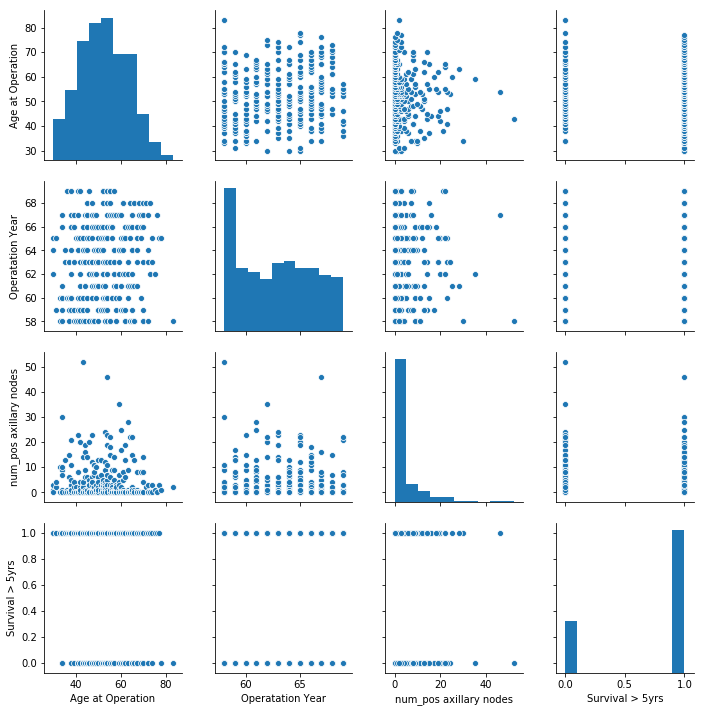

In [13]:
# TODO
sns.pairplot(df)

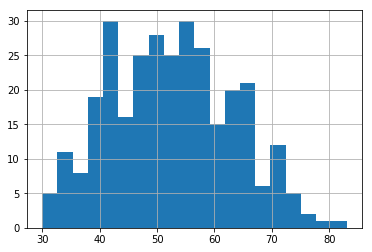

In [14]:
df['Age at Operation'].hist(bins=20)

In [0]:
age_bins = pd.cut(df['Age at Operation'], 5) # braek ages into 5 equal-sized bins

In [0]:
node_bins = pd.cut(df['num_pos axillary nodes'], 5)

In [18]:
pd.crosstab(node_bins, df['Survival > 5yrs'])

Survival > 5yrs,0,1
num_pos axillary nodes,,
"(-0.052, 10.4]",58,208
"(10.4, 20.8]",15,11
"(20.8, 31.2]",6,5
"(31.2, 41.6]",1,0
"(41.6, 52.0]",1,1


In [28]:
pd.crosstab(age_bins, df['Survival > 5yrs'])

Survival > 5yrs,0,1
Age at Operation,,
"(29.947, 40.6]",4,39
"(40.6, 51.2]",31,68
"(51.2, 61.8]",27,69
"(61.8, 72.4]",16,43
"(72.4, 83.0]",3,6


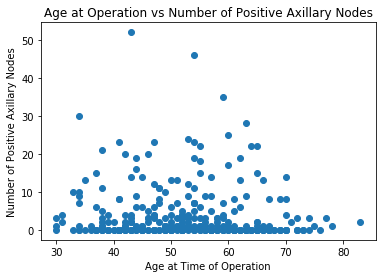

In [21]:
plt.scatter(df['Age at Operation'], df['num_pos axillary nodes'])
plt.title("Age at Operation vs Number of Positive Axillary Nodes")
plt.xlabel("Age at Time of Operation")
plt.ylabel("Number of Positive Axillary Nodes")
plt.show()


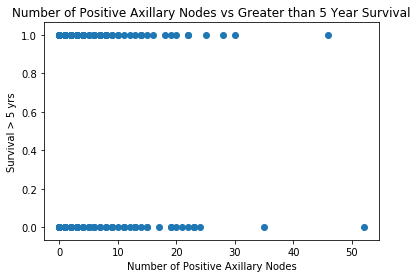

In [29]:
plt.scatter(df['num_pos axillary nodes'], df['Survival > 5yrs'])
plt.title("Number of Positive Axillary Nodes vs Greater than 5 Year Survival")
plt.ylabel("Survival > 5 yrs")
plt.xlabel("Number of Positive Axillary Nodes")
plt.show()


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

After looking over the data and plotting all of the features against each other there were a few things that jumped out to me. From the above plots it looks like 'Age at the Time of Operation' and 'Survival' might be negatively correlated in that as age gets higher the chances of survival great than 5 years drops. Intuitively this makes sense, as we get older and get to the high end of the age range there are more health issues and possible complications that are likely to effect survival and if caught early cancer is more treatable leading to a higher chance of surviving over 5 years.


One relationship that struck me as odd was the number of positive axillary nodes with survival over 5 years. It seems like in the range from 15-30 positive axillary nodes detected there was a greater chance of survival, I'm not quite sure the role the nodes play since I'm not that knowledgeable in this area but I thought it was an indicator of the cancer spreading so I would have assumed more nodes would lead to lower survival rates. This could be tied to the relationship between Age and Nodes as those with more positive axillary nodes detected have a more aggressive form of cancer that is spreading and the patients are not living to older ages when surgery is done and those diagnosed with cancer that has spread at an older age might not have opted for surgery.


The relationship between Age and Nodes is one I found interesting, older patients seem to have less positive nodes and this might be causing the strange relationship between survival and number of nodes. Older patients have lower survival rates for a number of reasons (some stated above) and patients in that age range with a higher number of positive nodes might not opt for the surgery or find the cancer has spread to far when diagnosed creating the strange relationship between number of nodes and survival greater than 5 years. It would be interesting to see the data of survival at different time intervals such as greater than 1yr, 3yrs 5yrs, 7yrs, and 10yrs. As someone whos had family members go through cancer treatment I think looking at survival of greater than or less than 5 years misses alot that could have been learned about when then cancer was found, how much it has spread, and survival at different ages after surgery. 
